<a href="https://colab.research.google.com/github/BillySiaga/Project2025/blob/main/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link

https://i.imgur.com/gAT5gVg.jpg

Columns explanation :

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account
CASH_ADVANCE: Cash in advance given by the user
CREDIT_LIMIT: Limit of Credit Card for user
PAYMENTS: Amount of Payment done by user

Instructions

Import you data and perform basic data exploration phase
Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
Perform partitional clustering using the K-means algorithm. Then, plot the clusters
Find the best k value and plot the clusters again.
Interpret the results

In [9]:
# importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


## *Data Preprocessing*

In [2]:
# Load dataset
data = pd.read_csv('/content/Credit_card_dataset.csv')
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [6]:
data.describe(include = 'all')

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN
top,C19190,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,NaN,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,NaN,0.000000,0.000000,0.000000,50.000000,0.000000
25%,NaN,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,NaN,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,NaN,1.000000,1110.130000,1901.134317,6500.000000,1113.821139


In [7]:
#checking on null values
data.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


## Data Cleaning and Preparation

In [8]:
# Droping noon-numeric column as it is not needed
data.drop('CUST_ID', axis=1, inplace=True)

# Fill the missing valuein credit limit using median
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

# standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#print the new columns of the dataset
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

<ipython-input-8-f01eb188cc97>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)


,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,-0.249434,-0.424900,-0.528979,-0.960378,-0.466786
1,0.134325,-0.469552,0.818642,0.688678,2.605605
2,0.518084,-0.107668,-0.383805,0.826100,-0.466786
3,-1.016953,0.232058,-0.598688,0.826100,-0.368653
4,0.518084,-0.462063,-0.364368,-0.905410,-0.466786


## *Hierarchical Clustering using Purchases and Credit limits features*

In [10]:
#subsetting the features
X = data_scaled[['PURCHASES', 'CREDIT_LIMIT']]


In [11]:
#linkage matrix for dendrogram
linked = linkage(X, method='ward', metric='euclidean')

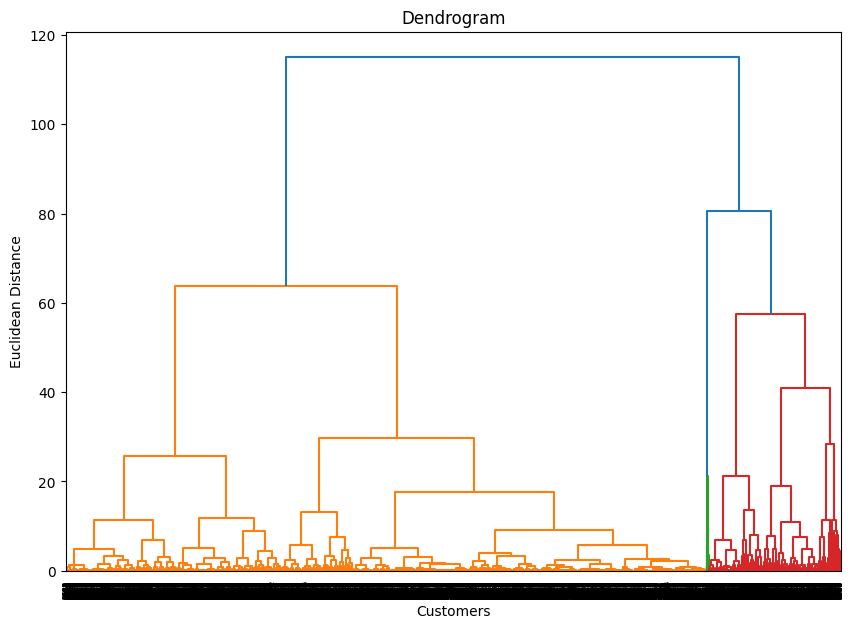

In [12]:
# plot dendogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

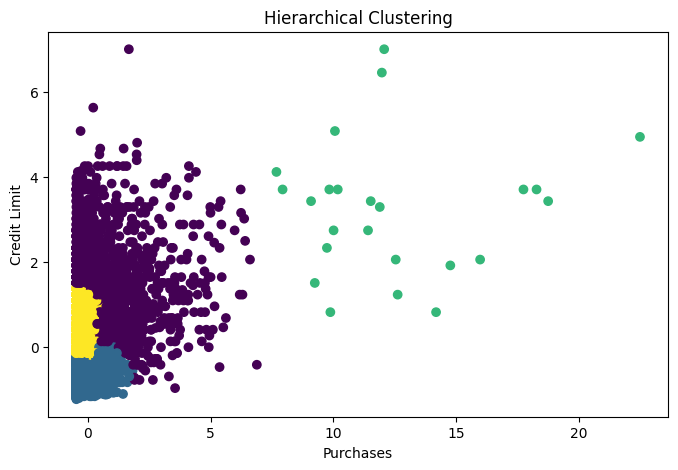

In [21]:
#fit Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=4)
hc_labels = hc.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(X['PURCHASES'], X['CREDIT_LIMIT'], c=hc_labels)
plt.title('Hierarchical Clustering')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.show()

## *K-Means Clustering*

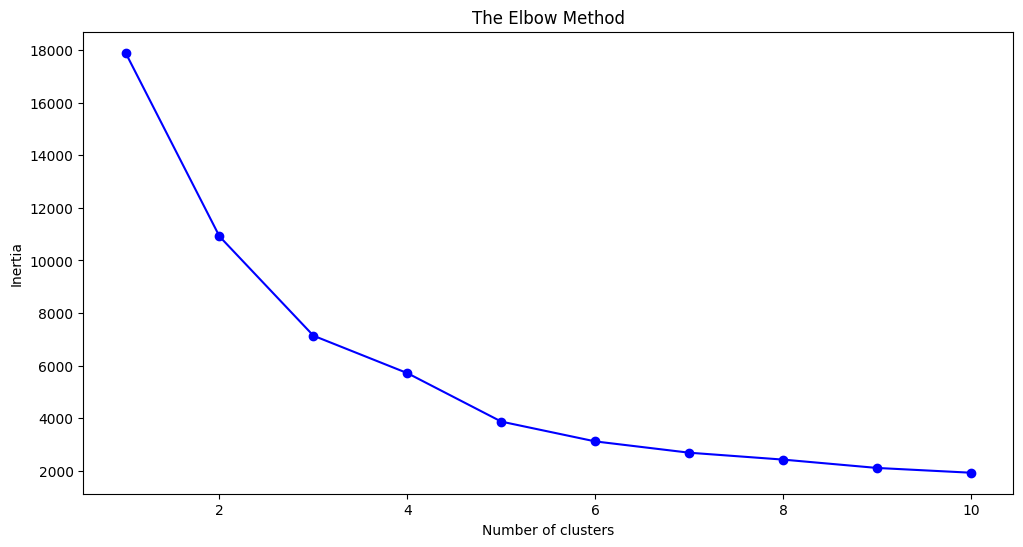

In [25]:
# using elbow method to find best k
inertia = []
k_range = range(1, 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

## *Fit and Plot KMeans*

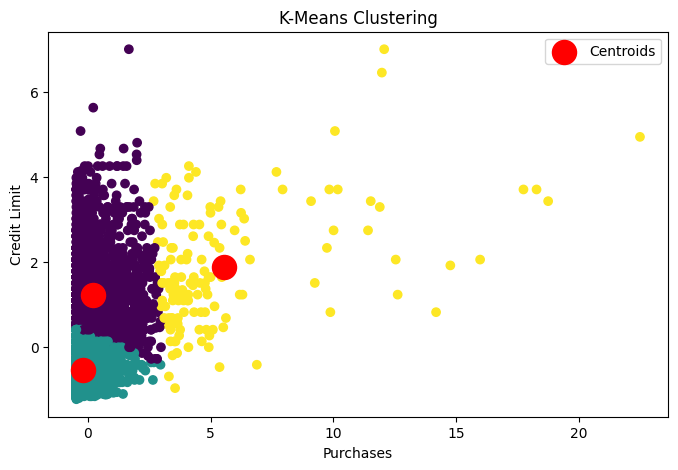

In [28]:
#fitting and plotting Kmeans

#fitting
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X['PURCHASES'], X['CREDIT_LIMIT'], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

## *Insights from the Clusters*

the plot points to four distinct clusters trabslating to four possible segments for the credit card holders.
The purple cluster of credit card holders concentrated towards the lower Purchases range but is spread through a wider range of limits indicating that the cluster could have high credit limits but do not make frequent purchases.

⚛ the purple cluster is widely spread out and covers a broader range of ourchses value. This indicates a cluster of high spending customers with different credit limits.

:: The cluster that is tightly packed in the lower region of both axes points to a customer cluster with both lower credit limits and with lower spending activity. they are potebtially inactive or new credit card holders.

customers in the yellow cluster can thus be targeted for premium credit card promotions for their broad spending habists.

The purple cluster pointing to lower purchase but strong credit limits could be targeted for loyalty incetives to encourage more spending.

Lastly, the lower activity and lower credit segment would be targeted through lower interest plans.
